# Khushi Meena

## Exploratory Data Analysis - Retail 
### Problem statement - find out the weak areas where you can work to make more profit.

#### Importing Necessary Libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Reading and Manipulating Data

In [68]:
df = pd.read_csv('SampleSuperstore.csv')

In [69]:
df.shape

(9994, 13)

In [70]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [71]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [73]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [74]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [75]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [76]:
#Dropping Unnecessary data
new_df = df.drop(['Postal Code'], axis = 1)
new_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [77]:
new_df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#### Finding coorelation btween different attributes

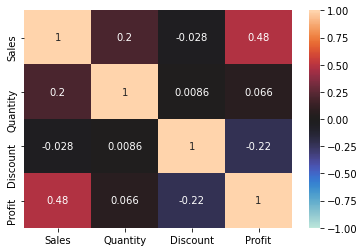

In [78]:
sns.heatmap(new_df.corr(),vmin = -1, vmax = 1, center = 0, annot = True)
plt.show()

#### Visualizing Data

In [79]:
#Defining a function for obtaining different plots
def V_plot(data, vari, sort_by, color, threshold_cat = 10):
    
    Entry = [i for i in data.columns.values if len(data[i].unique()) < threshold_cat and len(data[i].unique()) > 1]
    
    fig = plt.figure(figsize = (15,15))
    rows = len(Entry)//2
    cols = len(Entry)//2
        
    for i, num in zip(Entry, range(1, len(Entry) + 1)):
        ax = fig.add_subplot(rows, cols, num)
        data.groupby(i)[vari].sum().sort_values(by = sort_by).plot(kind = 'bar', ax = ax, title = i, color = color)
    
    plt.tight_layout(pad = 2.0)
    plt.show()

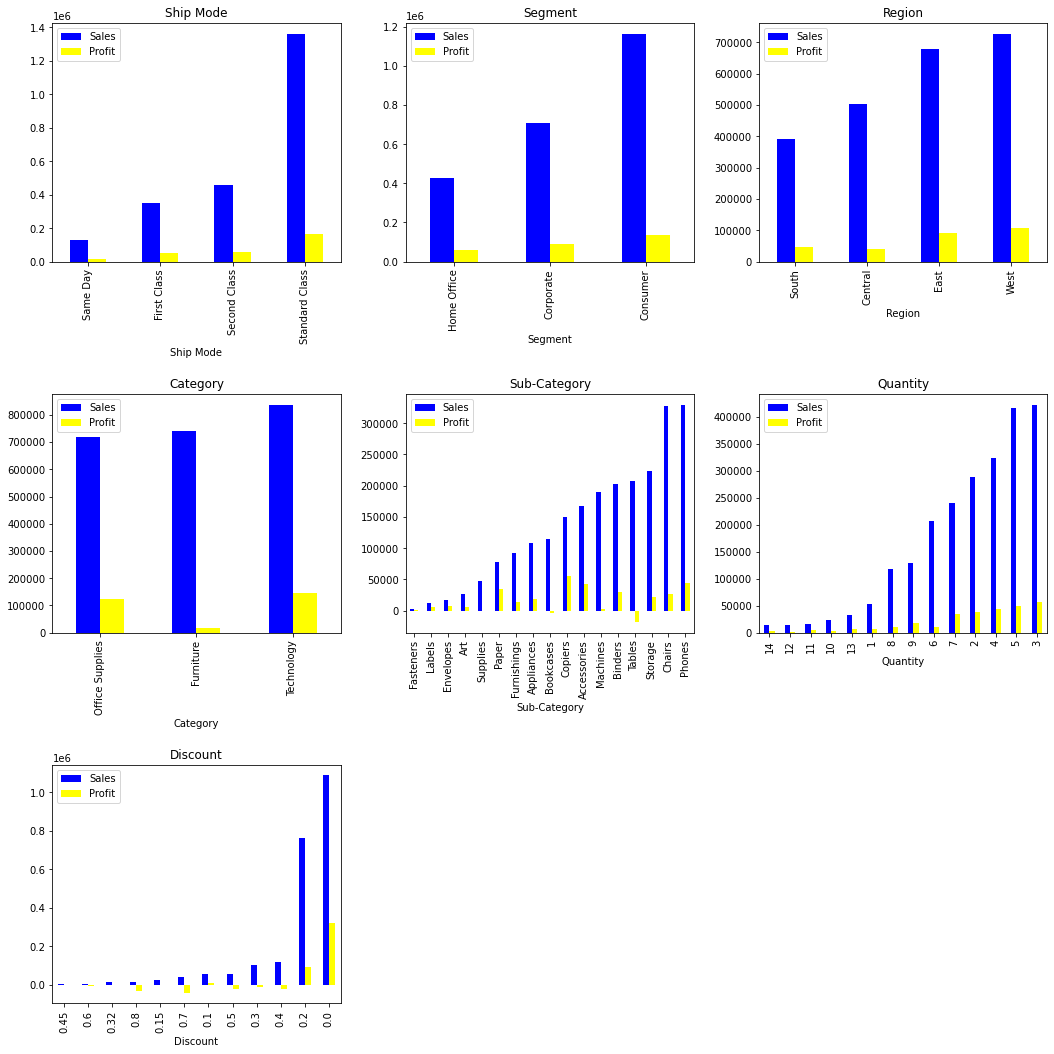

In [80]:
num = 20
vari = ['Sales', 'Profit']
sort_by = "Sales"
color = ['blue', 'yellow']
V_plot(df, vari, sort_by, color, num)


#### Determining Profit %

In [81]:
temp = ['Sub-Category', 'Ship Mode', 'Segment', 'Region', 'Category', 'Quantity', 'Discount']
for i in temp:
    
         df['Profit %'] = (df['Profit']/df['Sales'])*100
        
         print('**************',i,'***************')
         print(df.groupby(i)['Profit %', 'Sales'].mean().sort_values(['Profit %']), '\n\n')
         print('')

************** Sub-Category ***************
               Profit %        Sales
Sub-Category                        
Binders      -19.959510   133.560560
Appliances   -15.686934   230.755710
Tables       -14.772653   648.794771
Bookcases    -12.664007   503.859633
Machines      -7.202622  1645.553313
Chairs         4.389963   532.332420
Storage        8.911348   264.590553
Supplies      11.203947   245.650200
Phones        11.922197   371.211534
Furnishings   13.706635    95.825668
Accessories   21.820968   215.974604
Art           25.164573    34.068834
Fasteners     29.917051    13.936774
Copiers       31.719363  2198.941618
Envelopes     42.313976    64.867724
Paper         42.560036    57.284092
Labels        42.966346    34.303055 



************** Ship Mode ***************
                 Profit %       Sales
Ship Mode                            
Standard Class  11.007329  227.583067
First Class     11.594781  228.497024
Same Day        13.815135  236.396179
Second Class    15

#### Sales and Profit for each state

In [82]:
df.groupby('State')[['Sales', 'Discount','Profit']].sum().sort_values(by = 'Discount',ascending = False)

,Sales,Discount,Profit
State,,,
Texas,170188.0458,364.64,-25729.3563
Pennsylvania,116511.9140,192.90,-15559.9603
Illinois,80166.1010,191.90,-12607.8870
Ohio,78258.1360,152.40,-16971.3766
California,457687.6315,145.60,76381.3871
Florida,89473.7080,114.65,-3399.3017
North Carolina,55603.1640,70.60,-7490.9122
Arizona,35282.0010,68.00,-3427.9246
New York,310876.2710,62.40,74038.5486


Text(0.5, 1.0, 'Sales and Profit vs Discount ')

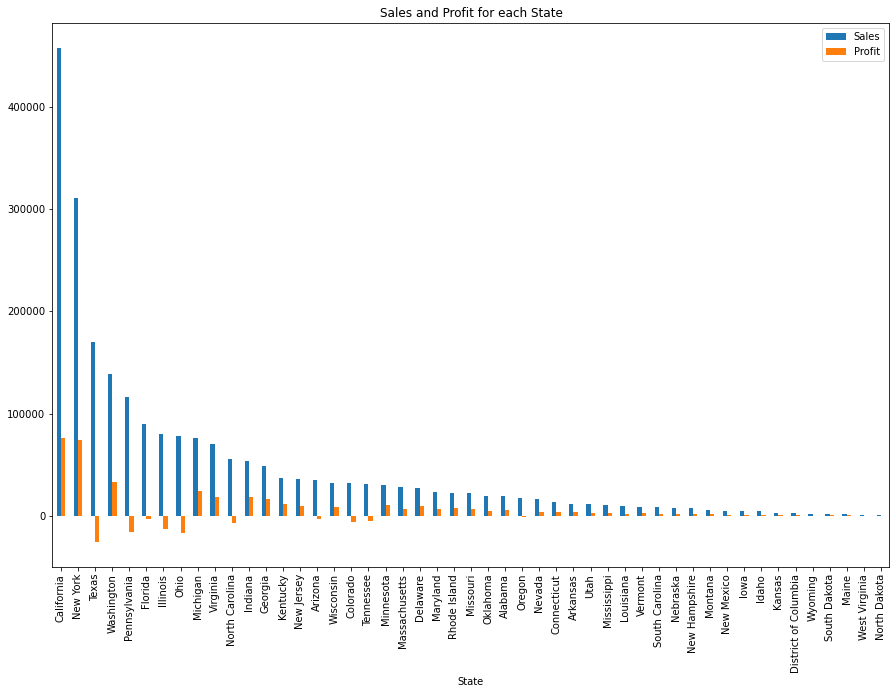

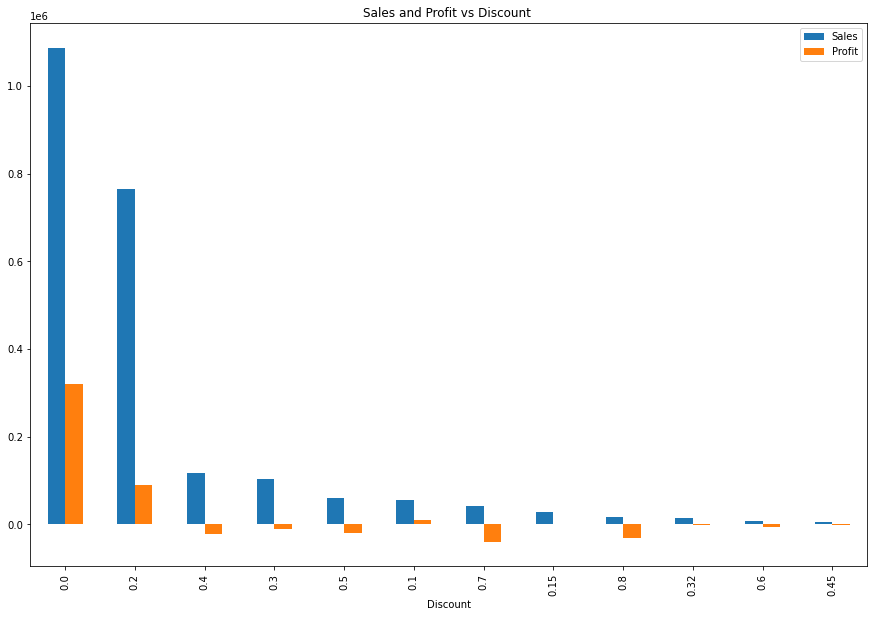

In [83]:
df.groupby('State')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False).plot.bar(figsize = (15,10))
plt.title('Sales and Profit for each State'), 
df.groupby('Discount')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False).plot.bar(figsize = (15,10))
plt.title('Sales and Profit vs Discount ')

#### -->So for the Discount greater than 20% the profit generted is very poor.

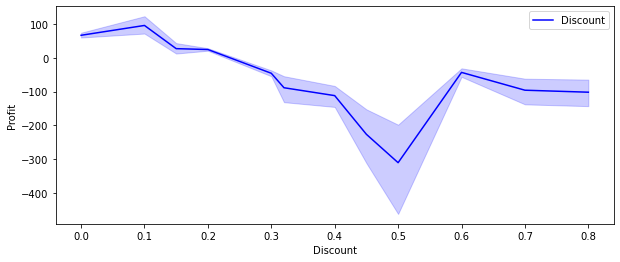

In [84]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount','Profit',data = df, color = 'blue', label = 'Discount')
plt.legend()
plt.show()

#### -->In General the profit is less if Discount given is high.

## Observations 

## Conclusions and Suggestions